

# CASE STUDY: DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

In [1]:
# Import the necessary libraries (pandas, numpy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style= 'ticks')


In [2]:
# Reading the files

cust_demog = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')
claim = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv')

In [4]:
cust_demog.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [5]:
claim.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [6]:
cust_claim = pd.merge(left=cust_demog, right=claim, left_on='CUST_ID', right_on='customer_id', how='inner')

In [7]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [68]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [69]:
cust_claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [70]:
cust_claim.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [71]:
# we have to change the datatype of DOB column

cust_claim['DateOfBirth'] = pd.to_datetime(cust_claim['DateOfBirth'], format='%d-%b-%y')
cust_claim['DateOfBirth']

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   2064-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [72]:
# datatype is changed but we can see that the years are more than 2023, so we need to subtract the year of DOB

cust_claim.loc[cust_claim.DateOfBirth.dt.year>2023,'DateOfBirth'] = cust_claim[cust_claim.DateOfBirth.dt.year>2023]['DateOfBirth'].apply(lambda x: x-pd.DateOffset(years = 100))

In [73]:
# hence no columns are left having year>2023
cust_claim[cust_claim.DateOfBirth.dt.year>2023]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


In [74]:
# we have to change the datatype of claim_date column
cust_claim.claim_date

0       11/27/2017
1       10/03/2018
2       02/02/2018
3       04/04/2018
4       06/17/2018
           ...    
1080    09/06/2018
1081    05/09/2017
1082    05/15/2017
1083    04/18/2017
1084    03/16/2017
Name: claim_date, Length: 1085, dtype: object

In [75]:
cust_claim['claim_date'] = pd.to_datetime(cust_claim['claim_date'], format='%m/%d/%Y')


In [76]:
# so datatype is changed from object to datetime
cust_claim['claim_date']

0      2017-11-27
1      2018-10-03
2      2018-02-02
3      2018-04-04
4      2018-06-17
          ...    
1080   2018-09-06
1081   2017-05-09
1082   2017-05-15
1083   2017-04-18
1084   2017-03-16
Name: claim_date, Length: 1085, dtype: datetime64[ns]

### 3.Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [77]:
# change data type of claim amount column to number

cust_claim['claim_amount']

0         $2980
1         $2980
2       $3369.5
3         $1950
4         $1680
         ...   
1080      $1770
1081      $2800
1082     $33080
1083      $2840
1084      $1490
Name: claim_amount, Length: 1085, dtype: object

In [78]:
cust_claim['claim_amount']=cust_claim['claim_amount'].apply(lambda x: str(x).replace('$',''))
cust_claim['claim_amount'].head(5)

0      2980
1      2980
2    3369.5
3      1950
4      1680
Name: claim_amount, dtype: object

In [79]:
cust_claim['claim_amount'] = np.where(cust_claim['claim_amount']=='nan','',cust_claim['claim_amount'])
cust_claim['claim_amount'] = pd.to_numeric(cust_claim['claim_amount'])

In [80]:
# datatype of the below series
cust_claim.claim_amount.dtype

dtype('float64')

In [81]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


### 4. Of all the injury claims, some of them have gone unreported with thepolice. Create an alert flag (1,0) for all such claims.

In [82]:
# different type of claim
cust_claim['claim_type'].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [83]:
# considering 'No' and 'Unknown' as unreported with the police

cust_claim['unreported_injury_claim']=np.where(
    (cust_claim['claim_type']=='Injury only') & (cust_claim['police_report'].isin(['No','Unknown'])),
    1,
    0)

In [86]:
# Displaying injury claim where complaint has not been reported
cust_claim[(cust_claim['claim_type']=='Injury only')] 

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1
10,1144598,Female,1980-04-27,WY,571-397-1798,Platinum,3502909,1144598,Driver error,2017-03-22,Auto,Unknown,Injury only,25010.0,1.0,No,1
11,1163515,Female,1995-02-03,TX,978-352-7634,Silver,94303580,1163515,Crime,2017-04-25,Auto,Yes,Injury only,30540.0,1.0,No,0
12,1223055,Male,1995-06-02,CA,726-984-2871,Platinum,26773102,1223055,Natural causes,2017-10-31,Auto,Yes,Injury only,33490.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,97514724,Male,1969-06-08,FL,641-684-7986,Platinum,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,1
1056,97545319,Male,1963-04-18,OR,749-261-7893,Silver,3487779,97545319,Crime,2018-06-30,Auto,No,Injury only,33520.0,1.0,No,1
1058,97640137,Male,1975-08-14,SD,812-824-4285,Platinum,86624774,97640137,Driver error,2018-02-02,Auto,Unknown,Injury only,29600.0,1.0,No,1
1068,98401399,Female,1968-10-07,IA,219-593-1674,Silver,35136402,98401399,Natural causes,2018-09-06,Auto,Unknown,Injury only,24900.0,1.0,No,1


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [87]:
# Sorting the DataFrame by "customer_id" and "claim_date" in descending order
cust_claim.sort_values(by=['customer_id', 'claim_date'], ascending=[True, False], inplace=True)

# Keeping only the most recent observation for each unique customer ID
cust_claim.drop_duplicates(subset='customer_id', keep='first', inplace=True)

# Resetting the index of the DataFrame
cust_claim.reset_index(drop=True, inplace=True)



In [88]:
# Displaying the updated DataFrame
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,0
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,1965-01-28,UT,517-562-4916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,1
1074,99723844,Female,1966-06-19,HI,457-752-1374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0
1075,99761663,Female,1963-11-18,NC,643-246-4718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1076,99892000,Male,1995-06-08,OR,395-246-6172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


In [89]:
# all in one code
cust_claim.sort_values(by=['CUST_ID','claim_date'], ascending=[True,False]).drop_duplicates(subset="customer_id", keep= "first")\
.reset_index(drop= True).head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,0
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [90]:
# chech for missing values in df
cust_claim.isnull().sum()

CUST_ID                     0
gender                      0
DateOfBirth                 0
State                       0
Contact                     0
Segment                     0
claim_id                    0
customer_id                 0
incident_cause              0
claim_date                  0
claim_area                  0
police_report               0
claim_type                  0
claim_amount               65
total_policy_claims        10
fraudulent                  0
unreported_injury_claim     0
dtype: int64

In [91]:
# calculating mean of claim_Amount column
mean1 = round(cust_claim['claim_amount'].mean(),2)

In [92]:
# imputing the missing values of the claim amount column from mean of that column
cust_claim['claim_amount'] = cust_claim['claim_amount'].fillna(mean1)
cust_claim.isna().sum()

CUST_ID                     0
gender                      0
DateOfBirth                 0
State                       0
Contact                     0
Segment                     0
claim_id                    0
customer_id                 0
incident_cause              0
claim_date                  0
claim_area                  0
police_report               0
claim_type                  0
claim_amount                0
total_policy_claims        10
fraudulent                  0
unreported_injury_claim     0
dtype: int64

In [93]:
# calculating mode of 'total_policy_claims' column
mode1 = cust_claim['total_policy_claims'].mode()[0]

In [94]:
# imputing the missing values of the 'total_policy_claims' column from mode
cust_claim['total_policy_claims'] = cust_claim['total_policy_claims'].fillna(mode1)
cust_claim.isna().sum()

CUST_ID                    0
gender                     0
DateOfBirth                0
State                      0
Contact                    0
Segment                    0
claim_id                   0
customer_id                0
incident_cause             0
claim_date                 0
claim_area                 0
police_report              0
claim_type                 0
claim_amount               0
total_policy_claims        0
fraudulent                 0
unreported_injury_claim    0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18,  Youth 18-30,  Adult 30-60,  Senior > 60

In [95]:
max_claim_date = cust_claim.claim_date.max()
max_claim_date

Timestamp('2018-10-30 00:00:00')

In [96]:
cust_claim['Age'] = round((max_claim_date - cust_claim['DateOfBirth']).apply(lambda x: x.days/365.25),0)

In [97]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.00,1.0,No,0,47.0
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.00,3.0,No,1,38.0


In [98]:
cust_claim['Age_cat'] = np.where(cust_claim['Age']<18,'Children',
                               np.where((cust_claim['Age']>=18) & (cust_claim['Age']<=30),'Youth',
                                        np.where((cust_claim['Age']>30) & (cust_claim['Age']<=60),'Adult','Senior')))

In [99]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.00,1.0,No,0,47.0,Adult
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.00,3.0,No,1,38.0,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [100]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth


In [101]:
cust_claim.groupby(by='Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12846.400431
Platinum,12371.654986
Silver,12267.859653


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [102]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.00,1.0,No,0,47.0,Adult
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.00,3.0,No,1,38.0,Adult


In [103]:
cust_claim[cust_claim['claim_date']<'2018-09-10'].groupby(by='incident_cause')[['claim_amount']].agg(Total_claim_amt=('claim_amount','sum'))


,Total_claim_amt
incident_cause,
Crime,721938.65
Driver error,3315850.76
Natural causes,1312987.07
Other causes,3723151.87
Other driver error,3277536.49


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [104]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth


In [105]:
cust_claim.incident_cause.unique()

array(['Driver error', 'Other causes', 'Natural causes',
       'Other driver error', 'Crime'], dtype=object)

In [106]:
adult_state_gp = cust_claim[(cust_claim['State'].isin(['TX','DE','AK'])) & (cust_claim['incident_cause'].isin(['Driver error','Other driver error'])) & (cust_claim['Age_cat']=='Adult')]

In [107]:
adult_state_gp.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
6,684748,Male,1977-08-03,AK,613-385-2863,Gold,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.00,2.0,No,0,41.0,Adult
22,2632562,Female,1985-12-14,AK,498-597-9658,Platinum,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.00,1.0,No,0,33.0,Adult
28,3159546,Male,1987-10-20,TX,586-129-9752,Platinum,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.00,4.0,No,1,31.0,Adult
40,4669941,Male,1982-08-03,AK,761-462-3458,Platinum,70068,4669941,Driver error,2017-11-06,Auto,Unknown,Injury only,29900.00,1.0,Yes,1,36.0,Adult


In [108]:
adult_state_gp.groupby(by='State')[['Age_cat']].count()

,Age_cat
State,
AK,8
DE,9
TX,7


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [109]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth


In [110]:
gender_segment_gp =cust_claim.groupby(by=['gender','Segment'])[['claim_amount']].sum()
gender_segment_gp

claim_amount
gender Segment               
Female Gold        2110044.57
       Platinum    2369722.11
       Silver      1897544.99
Male   Gold        2655969.99
       Platinum    2096445.34
       Silver      2347134.45

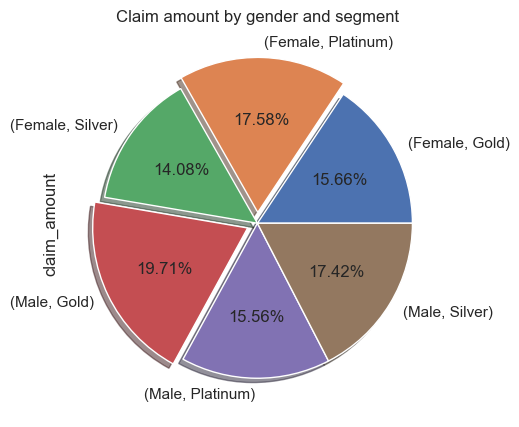

In [131]:
gender_segment_gp.plot(kind='pie',y='claim_amount',figsize=(5,10), autopct='%1.2f%%',legend = False, shadow=True,
                       explode=[0.0,0.07,0.0,0.07,0.0,0.0])
plt.title('Claim amount by gender and segment')
plt.show()

*From the above pie chart, based on claim amount by gender and segment , we can infer that :-*
 
*Males having segment Gold and Females having segment Platinum are claiming the most*

   

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [132]:
# dataframe containing driver related issue
driver_issue_df = cust_claim[cust_claim['incident_cause'].isin(['Driver error','Other driver error'])]
driver_issue_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.00,3.0,No,1,38.0,Adult
6,684748,Male,1977-08-03,AK,613-385-2863,Gold,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.00,2.0,No,0,41.0,Adult
8,885337,Male,1962-02-17,HI,321-534-5263,Platinum,86240106,885337,Driver error,2017-07-01,Auto,No,Material only,2490.00,2.0,No,0,57.0,Adult
10,1144598,Female,1980-04-27,WY,571-397-1798,Platinum,3502909,1144598,Driver error,2017-03-22,Auto,Unknown,Injury only,25010.00,1.0,No,1,39.0,Adult


In [133]:
# count of gender for claim amount related to driver issues
gender_claim_count = driver_issue_df.groupby(by='gender').agg(count=('gender','count'))
gender_claim_count

,count
gender,
Female,221
Male,281


In [134]:
gender_claim_count.index

Index(['Female', 'Male'], dtype='object', name='gender')

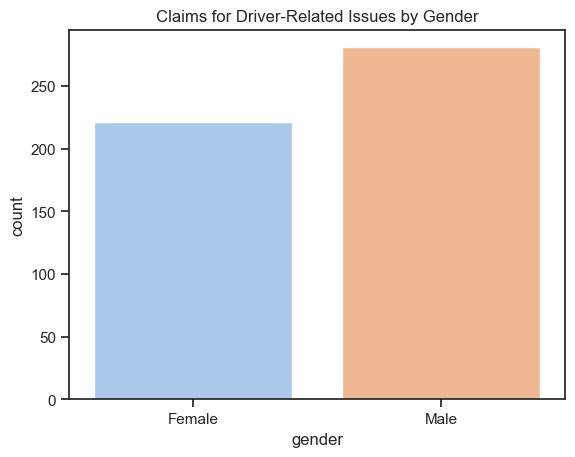

In [135]:
# plotting using sns
sns.barplot(data=gender_claim_count, x=gender_claim_count.index, y='count', palette='pastel')
plt.title('Claims for Driver-Related Issues by Gender')
plt.show()

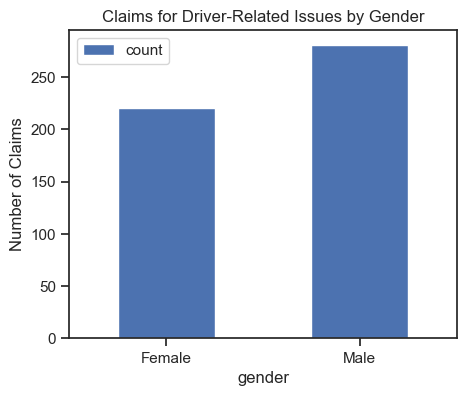

In [136]:
# plotting using pandas
gender_claim_count.plot(kind= 'bar', figsize=(5,4))
plt.title('Claims for Driver-Related Issues by Gender')
plt.ylabel('Number of Claims')
plt.xticks(rotation=0)
plt.show()

*Among males and females, Males are claiming the most for all driver related issues.*

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [137]:
cust_claim['fraudulent'].unique()

array(['Yes', 'No'], dtype=object)

In [138]:
fraudulent_df = cust_claim[cust_claim['fraudulent']=='Yes']
fraudulent_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth
9,1123356,Female,1960-07-29,OR,736-725-9481,Silver,50906515,1123356,Crime,2018-08-23,Auto,No,Material only,2507.00,5.0,Yes,0,58.0,Adult
13,1300972,Female,1966-06-08,ID,378-587-1687,Platinum,4881066,1300972,Crime,2018-03-21,Home,No,Material only,2369.00,1.0,Yes,0,52.0,Adult


In [139]:
# so we can see that the fraudulent claims are coming from Adult and Youth category
fraud_category = fraudulent_df.groupby(by='Age_cat').agg(count=('Age_cat','count'))
fraud_category

,count
Age_cat,
Adult,173
Youth,72


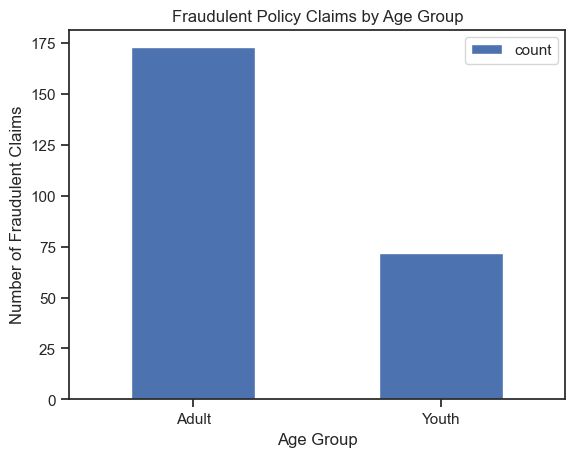

In [140]:
fraud_category.plot(kind='bar')
plt.title('Fraudulent Policy Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.xticks(rotation=0)
plt.show()

*So we can say that out of all the Age groups - Adults and Youths are doing most of the fraudulent claims.*

*Again from the above plot, out of this two categories, adults are claiming the highest frauds.*



### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [141]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth


In [142]:
# adding month col in dataframe
cust_claim['Month'] = cust_claim['claim_date'].dt.month

In [143]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult,4
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult,4
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth,10


In [145]:
monthly_trend = cust_claim.groupby(by='Month')[['claim_amount']].sum()
monthly_trend

,claim_amount
Month,
1,1327170.61
2,1164542.42
3,1320250.15
4,1292513.96
5,1114461.34
6,1279030.38
7,1379316.07
8,911297.19
9,983200.30


In [146]:
cust_month_order =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

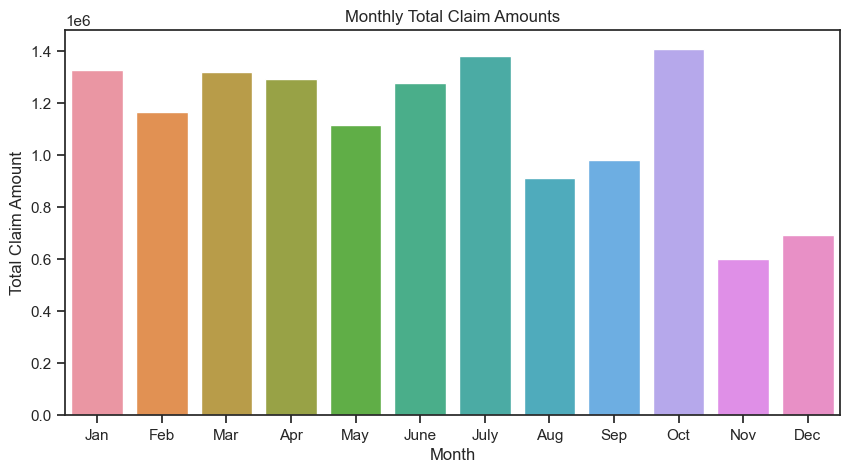

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(data=monthly_trend, x=cust_month_order, y=monthly_trend['claim_amount'])
plt.title('Monthly Total Claim Amounts')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.show()

*Monthly trends of the amount claimed by the customers are relatively low in months November, December,August and September as compared to all other months*

*The amounts claimed by customers is higher in Octonber and lower in November*

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [148]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult,4
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult,4
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth,10


In [149]:
# df having fraud claims
fraud_claims = cust_claim[cust_claim['fraudulent']=='Yes']
fraud_claims.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult,4
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult,4
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth,10


In [150]:
# average claim amount for gender and age categories representing fraudulent claims
fraud_gp = fraud_claims.pivot_table(index='gender',columns='Age_cat',aggfunc='mean', values='claim_amount')
fraud_gp

Age_cat,Adult,Youth
gender,,
Female,12337.432747,7923.306471
Male,16804.645366,10686.018158


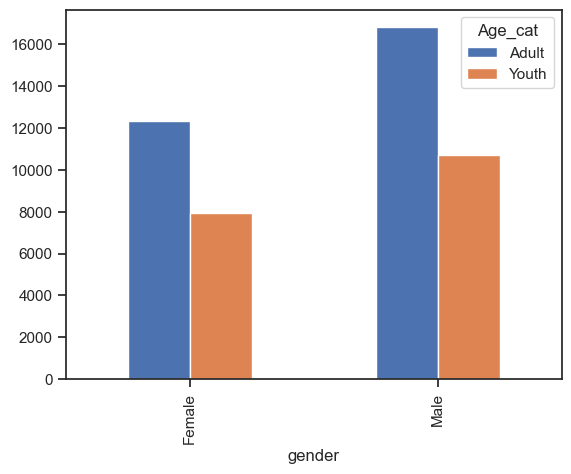

In [151]:
fraud_gp.plot(kind='bar')
plt.show()

In [152]:
# df having non fraud claims
non_fraud_claims = cust_claim[cust_claim['fraudulent']=='No']
non_fraud_claims.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
3,441097,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0,47.0,Adult,3
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1,38.0,Adult,7
5,608461,Male,1994-12-17,AR,963-187-2873,Platinum,7180084,608461,Crime,2018-07-14,Auto,No,Material only,2630.0,1.0,No,0,24.0,Youth,7


In [153]:
# average claim amount for gender and age categories representing non fraudulent claims
non_fraud_gp = non_fraud_claims.pivot_table(index='gender',columns='Age_cat',aggfunc='mean', values='claim_amount')
non_fraud_gp  

Age_cat,Adult,Youth
gender,,
Female,12272.506121,12699.492975
Male,12349.650993,12293.841628


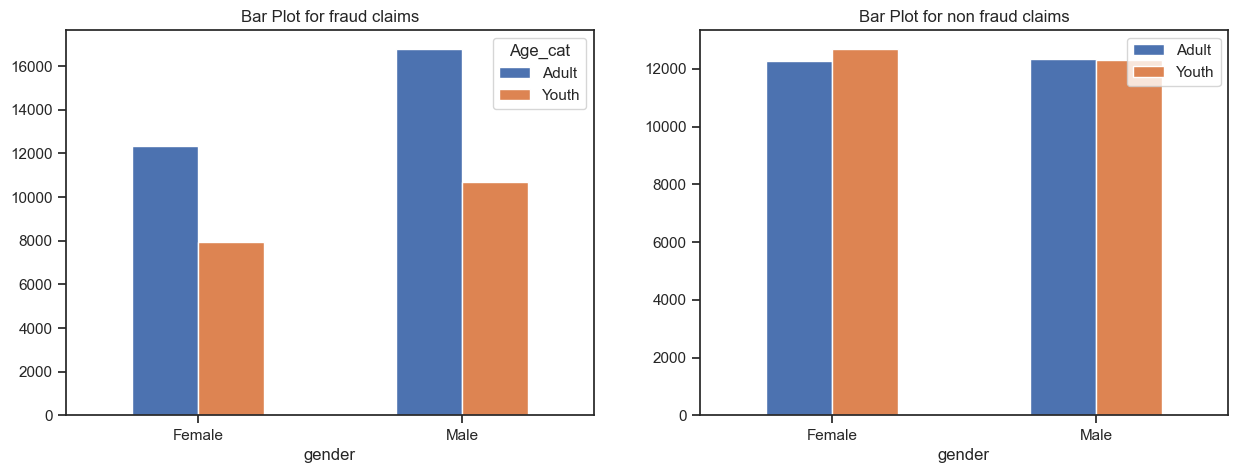

In [154]:
# making subplots for plotting graph
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5))   # making subplots

fraud_gp.plot(kind='bar',ax=axs[0])                # plotting bar graph for axs[0]
non_fraud_gp.plot(kind='bar',ax=axs[1])             # plotting bar graph for axs[0]

axs[0].set_title('Bar Plot for fraud claims')      # setting up title for plots
axs[1].set_title('Bar Plot for non fraud claims')    # setting up title for plots

plt.legend(loc='upper right')     # setting up legend position

axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=0)    # rotating the x-tick labels for axs[0]
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)    # rotating the x-tick labels for axs[1]

plt.show()

*From the above graph we found that non fraudulent claims are higher than the fraudulent claims, and almost both the gender categories and age categories are raising the claims* 

*For fraudulent claims - Among male and females, males are the one who are claiming higher amount*

*Also in each gender category adults are claiming higher amounts*





### Based on the conclusions from exploratory analysis as well as suitablestatistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.


### 16. Is there any similarity in the amount claimed by males and females?

In [270]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult,4
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult,4
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth,10


In [271]:
# Define the hypothesis

# Null Hypothesis (H0): There is no relationship between the amount claimed by male and female 
# H0: u1=u2 (similarity b/w amounts claimed)

# Alternate Hypothesis (Ha): There is a relationship between the amount claimed by male and female 
# Ha: u1<>u2 (no similarity b/w amouns claimed means) --- either less than or greater than

# CI(Confidence Interval): 95%
# Significance of value (p-value) - (1-CI) - 5% (0.05)

In [272]:
# Here we have to compare 2 independent samples male and female, so we will use (independent two sample t-test)
# Test statistic - T-Test-independent


In [273]:
# Take the two samples -- Male Sample claim amounts
Male = cust_claim.loc[cust_claim['gender'] == 'Male','claim_amount']
Male

1       39192.0
2        1621.5
3       37040.0
5        2630.0
6        2920.0
         ...   
1067     2370.0
1072     2260.0
1073    21480.0
1076     2415.0
1077     2310.0
Name: claim_amount, Length: 551, dtype: float64

In [274]:
# Female sample claim amounts
Female = cust_claim.loc[cust_claim['gender'] == 'Female','claim_amount']
Female

0       12501.73
4       35250.00
7       21190.00
9        2507.00
10      25010.00
          ...   
1069    20033.00
1070     3139.50
1071     1495.00
1074    14360.00
1075     1242.00
Name: claim_amount, Length: 527, dtype: float64

In [275]:
# display the average claim amounts by both samples

print("The average amount claimed by males is ",Male.mean())
print("The average amount claimed by females is ",Female.mean())

The average amount claimed by males is  12884.845335753174
The average amount claimed by females is  12101.160664136622


In [278]:
# perform the test

import scipy.stats as stats

stats.ttest_ind(Male,Female)


Ttest_indResult(statistic=0.9625093883145789, pvalue=0.3360100394474974)

In [279]:
# p-value - 0.05 (defined)
# Conclusion : From the above we can see that the revised p-value(0.3360100) is more than the defined p-value(0.05)
# So we fail to reject Ho (Probability of Ho getting true increases)
# Hence we ca claim that the amounts claimed are same.

In [280]:
# Business Conclusion:

# Hence we can claim that there exist similarity between the amounts claimed by both gender.

### 17. Is there any relationship between age category and segment?

In [286]:
# Relationship b/w 2 categorical variables -- we will use chisquare test
cust_claim.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'unreported_injury_claim', 'Age', 'Age_cat', 'Month'],
      dtype='object')

In [287]:
cust_claim[['Age_cat','Segment']].head()

,Age_cat,Segment
0,Adult,Platinum
1,Adult,Silver
2,Youth,Silver
3,Adult,Gold
4,Adult,Gold


In [283]:
# Age category we have 2 groups
cust_claim.Age_cat.value_counts()

Adult    756
Youth    322
Name: Age_cat, dtype: int64

In [284]:
# we have 3 segments
cust_claim.Segment.value_counts()

Gold        371
Platinum    361
Silver      346
Name: Segment, dtype: int64

In [288]:
# Null Hypothesis (H0):  There is no relation between age category and segment
# Alternative Hypothesis (Ha):  There is Association between age category and segment
# CI - 99%
# Significance value/ p-value - 0.01

In [289]:
# get the ob_freq_table from the dataset

obs_freq = pd.crosstab(cust_claim.Segment, cust_claim.Age_cat)
obs_freq 

Age_cat,Adult,Youth
Segment,,
Gold,267,104
Platinum,245,116
Silver,244,102


In [290]:
stats.chi2_contingency(obs_freq)

Chi2ContingencyResult(statistic=1.5057512823367833, pvalue=0.47101014723784596, dof=2, expected_freq=array([[260.18181818, 110.81818182],
       [253.16883117, 107.83116883],
       [242.64935065, 103.35064935]]))

In [291]:
# Calculated p-value : 0.471010

# Conclusion: Since the revised p-value is more than the defined p-value(0.01), So we fail to reject Ho  (Probability of Ho getting true increases)


In [292]:
# Business Implication : Hence we can claim that there exist no relationship b/w the age category and segment
# The claims made by both age category and segments are not statistically significant.


# The above chi-squared test confirms no significant relationship between age categories and insurance segments,
# it implies age is not the primary factor in segmenting insurance customers.The company should:

# Reevaluate segmentation strategies beyond age.
# Personalize offerings based on factors like policy type and claims history.
# Refine marketing for a more targeted approach.
# Consider diversifying insurance products.
# Prioritize customer-centric claims handling and data enrichment to gather additional data on 
# customer behavior, preferences, and lifestyle factors that may influence insurance choices.
# Continuously monitor changing customer preferences.

# This approach aims to enhance customer satisfaction and customizes insurance services to individual needs 
# beyond age demographics.

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [293]:
cust_claim.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_injury_claim,Age,Age_cat,Month
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.73,1.0,Yes,1,40.0,Adult,4
1,263204,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.00,1.0,Yes,0,46.0,Adult,4
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50,2.0,Yes,0,30.0,Youth,10


In [294]:
# Define the Hypothesis

# Null Hypothesis (H0): There is no significant difference between the claim amounts in the current year
# and the 2016-17 fiscal average of $10,000.

# Alternae Hypothesis (Ha): There is a significant difference between the claim amounts in the current year 
# and the 2016-17 fiscal average of $10,000.

In [295]:
# (2016-17 fiscal year average given)

Population_mean = 10000

In [296]:
# The data has been provided b/w these dates'2017-01-01' to '2018-10-30'

start_date = cust_claim.claim_date.min()
print(start_date)
end_date = cust_claim.claim_date.max()
print(end_date)

2017-01-01 00:00:00
2018-10-30 00:00:00


In [297]:
# Total average claim amount of 2017-18

Sample_mean = round(cust_claim['claim_amount'].mean(),2)
Sample_mean

12501.73

In [298]:
# display the average claim amounts of both years

print("The average amount claimed in 2016-17 is ",Population_mean)
print("The average amount claimed in 2017-18 ",Sample_mean)

The average amount claimed in 2016-17 is  10000
The average amount claimed in 2017-18  12501.73


In [299]:
# Test statistic - T-Test 1 sample (because we have 1 sample and 1 population)
# CI - 95%
# Signifiance of value (p_value) - (1-CI) - 5%

In [300]:
cust_claim['claim_amount']

0       12501.73
1       39192.00
2        1621.50
3       37040.00
4       35250.00
          ...   
1073    21480.00
1074    14360.00
1075     1242.00
1076     2415.00
1077     2310.00
Name: claim_amount, Length: 1078, dtype: float64

In [301]:
# performing the test

stats.ttest_1samp(a=cust_claim['claim_amount'],popmean=Population_mean)

TtestResult(statistic=6.146897698482048, pvalue=1.1110844570623794e-09, df=1077)

In [302]:
# The revised pvalue=1.1110844570623794e-09 is very small value, equivalent to - 0.00000000111108445706

# Since the revised p-value is less than defined p-value(0.05), so probability of H0 becoming true decreases


In [303]:
# Conclusion : Since the p-value is less that 0.05, we fail to reject alternate hypothesis(Ha)

# Hence we can claim that there is a significant difference between the current year's claim amounts
# and the 2016-17 fiscal average of $10,000.

In [304]:
# Business Conclusion:
    
# It can be determined that there is a significant rise in claim amounts in the current year compared to the 2016-17 fiscal year
# average. This information can guide strategic decisions within the insurance company, 
# particularly in terms of pricing, risk management, and customer communication.

### 19. Is there any difference between age groups and insurance claims?

In [305]:
cust_claim.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'unreported_injury_claim', 'Age', 'Age_cat', 'Month'],
      dtype='object')

In [306]:
# There are 2 age categories in the data
cust_claim.Age_cat.value_counts()

Adult    756
Youth    322
Name: Age_cat, dtype: int64

In [307]:
cust_claim.total_policy_claims.value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [308]:
# Define the hypothesis

# Null Hypothesis (H0) :  There is no significant difference in insurance claims between different age groups.
# (There is no influence of age groups on insurance claims)

# Alternative Hypothesis (Ha):  : There is a significant difference in insurance claims between different age groups.
# (There is some influence of age groups on insurance claims)

# CI(Confidence Interval): 95%
# Significance of value (p-value) - (1-CI) - 5% (0.05)

In [309]:
# Here we have to compare 2 independent samples Adult and Youth, so we will use  (independent two sample t-test)
# Test statistic - T-Test-independent

In [310]:
# Take the two samples -- Adult insurance claim
Adult = cust_claim.loc[cust_claim['Age_cat'] == 'Adult','total_policy_claims']
Adult

0       1.0
1       1.0
3       1.0
4       3.0
6       2.0
       ... 
1068    1.0
1071    1.0
1073    1.0
1074    1.0
1075    1.0
Name: total_policy_claims, Length: 756, dtype: float64

In [311]:
# Youth insurance claim
Youth = cust_claim.loc[cust_claim['Age_cat'] == 'Youth','total_policy_claims']
Youth

2       2.0
5       1.0
7       1.0
11      1.0
12      3.0
       ... 
1069    3.0
1070    3.0
1072    1.0
1076    2.0
1077    1.0
Name: total_policy_claims, Length: 322, dtype: float64

In [312]:
# display the average claim amounts by both samples

print("The average insurance claim by Adult is ",Adult.mean())
print("The average insurance claim by Youth is ",Youth.mean())

The average insurance claim by Adult is  1.566137566137566
The average insurance claim by Youth is  1.624223602484472


In [313]:
# perform the test

stats.ttest_ind(Adult,Youth)

Ttest_indResult(statistic=-0.7621831211765578, pvalue=0.44611775460682257)

In [314]:
# Conclusion : From the above we can see that the revised p-value(0.44611775) is more than the defined p-value(0.05)
# So we fail to reject Ho (Probability of Ho getting true increases)
# Hence we can claim that, there is no significant difference in insurance claims between different age groups. 

In [315]:
# Business Conclusion:

# We fail to reject the null hypothesis, it implies that age may not be a significant factor in explaining differences
# in insurance claims. The company may focus on other variables, such as coverage type or region, 
# to better understand claim patterns and make informed business decisions.


### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [318]:
cust_claim.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'unreported_injury_claim', 'Age', 'Age_cat', 'Month'],
      dtype='object')

In [319]:
# Total policy variable count
cust_claim.total_policy_claims.value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

<Axes: xlabel='total_policy_claims', ylabel='claim_amount'>

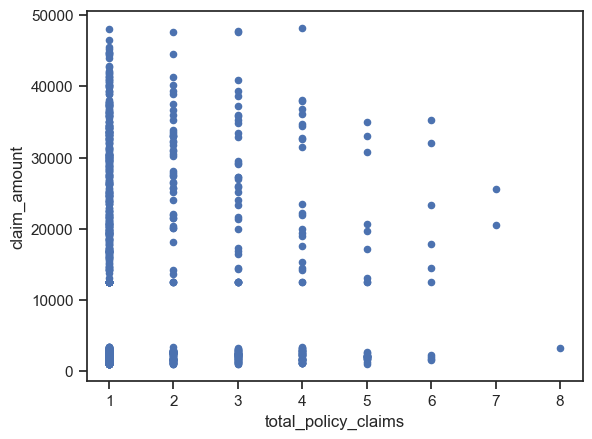

In [320]:
# we have 2 numerical variable here, so we can check the relationship using correlation
# Relationship b/w Total policy claim and claimed amount using Correlation

cust_claim.plot(kind='scatter', x='total_policy_claims',y= 'claim_amount')

In [321]:
# So from here we can see that the two variables are negatively correlated, means with the increase in poliy claims claim amount decreases and vice versa
cust_claim[['total_policy_claims',"claim_amount"]].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.022402
claim_amount,-0.022402,1.000000


In [322]:
# Null Hypothesis (H0): There is no significant relationship (correlation) between the total number of policy claims and the claimed amount.
# Alternative Hypothesis (Ha):  There is a significant relationship (correlation) between the total number of policy claims and the claimed amount.
# CI: 95%, p:0.05

# perform the test
stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)

PearsonRResult(statistic=-0.02240156738952853, pvalue=0.4624932643762615)

In [ ]:
# Conclusion: Since the revised p-value(0.462493) 
# is more than the defined p-value(0.05), So we fail to reject Ho (prob of H0 getting true increases)

# Hence we can claim that there exist no significant relationship b/w the total number of policy claims and the claimed amount.

In [ ]:
# Business Conclusion:

# Since H0 is accepted, it means that the insurance company should not base its business decisions solely on
# the relationship between the total number of policy claims and the claimed amount. Instead, the company should focus
# on a more comprehensive analysis of various factors that influence pricing, risk assessment, claims management, 
# effective communication to manage customer expectations within the insurance context.